# Data Analysis for the data set (Absenteeism at Work)

In [11]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from data_utils import *
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

In [6]:
file = 'dataset/Absenteeism_at_work.csv'

# Load the dataset as DataFrame in Pandas and then convert to matrix
data = load_dataset(file)

Shape of dataset is:(740, 22)
Type of features is:
ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
Absenteeism category                 int64
dty

[  0.           1.           2.           3.           4.
   5.           7.           8.           8.01232593   8.23561795
   8.2848248    8.64671651   8.75261924   9.75758505  10.17549651
  10.36175394  10.59857078  11.05330065  11.12468544  11.48651713
  11.60021378  11.653523    11.68872984  12.01655946  12.41269235
  12.60472508  12.64874152  12.66949449  13.01567156  13.10058098
  13.3850259   14.00202613  14.18533531  14.1896307   14.81058939
  14.86774674  14.93218216  14.93469574  15.28524411  15.41935878
  15.57207864  15.84811898  15.85383975  16.          16.4900703
  16.5001381   17.03166682  17.10057751  18.0034971   18.40990197
  18.42460788  19.61008121  19.90179247  20.64684993  20.90134063
  20.95885004  21.00451115  21.39322989  21.77644281  21.85888391
  22.24982662  22.25171753  23.17618899  23.58263515  24.
  24.59280097  28.04318863  30.39667779  31.51753914  32.
  38.56887167  40.          48.          53.86776508  54.98224397
  56.          56.64836316  62.2993

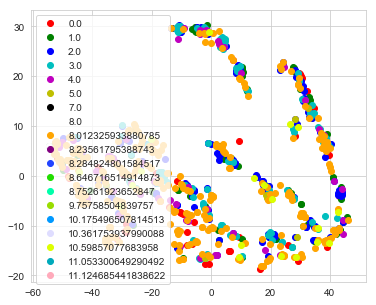

In [12]:
X, y = np.split(data,[-2],axis=1) # Or simply : np.split(data,[-1],1)
y, yignore = np.split(y,[-1],axis=1) # Or simply : np.split(data,[-1],1)
X = normalize(X, axis=1, norm='l1')
#print(data)
#print(X)
#print(y)
#print(np.unique(y))

tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
#print(X_2d.shape)
#print(X_2d)

y = y.ravel()
#print(y)
#print(y==1)

target_names = np.unique(y)
target_ids = range(len(target_names))
print(target_names)
print(target_ids)

plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple','#2244FF','#22DD00','#00FFAA','#99DD00','#0099FF','#DFDDFF','#DDFF00','#00AABB','#FFAABB'
#colors = cm.rainbow(np.linspace(0, 1, len(y)))
print(len(colors))
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
#plt.scatter(X_2d[:, 0], X_2d[:, 1], c='r', label='1')
plt.legend()
plt.show()

[0. 1.]
range(0, 2)


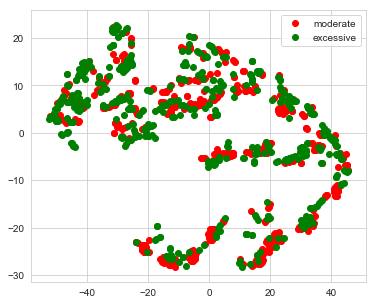

In [13]:
X, y = np.split(data,[-1],axis=1) # Or simply : np.split(data,[-1],1)
X = normalize(X, axis=1, norm='l1')
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
#print(X_2d)
y = y.ravel()
#print(y)

target_names = np.unique(y)
target_ids = range(len(target_names))
names = ["moderate", "excessive"]
print(target_names)
print(target_ids)

plt.figure(figsize=(6, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

Shape of X: (740, 21)
Shape of y: (740, 1)
Before OverSampling, counts of label '1': [272]
Before OverSampling, counts of label '0': [468] 

After OverSampling, the shape of X: (936, 21)
After OverSampling, the shape of y: (936, 1) 

After OverSampling, counts of label '1': [468]
After OverSampling, counts of label '0': [468]
Size of the whole data after over sampling (936, 22)
[0. 1.]
range(0, 2)


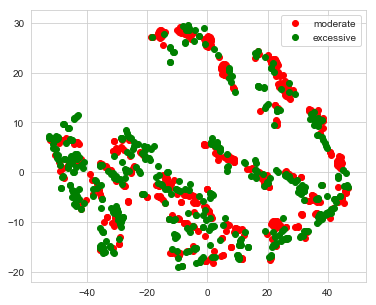

In [17]:
col = 'Absenteeism category'
df = pd.read_csv(file)
data = sample_data(df, col)

X, y = np.split(data,[-1],axis=1) # Or simply : np.split(data,[-1],1)
X = normalize(X, axis=1, norm='l1')
tsne = TSNE(n_components=2)
X_2d = tsne.fit_transform(X)
y = y.ravel()

target_names = np.unique(y)
target_ids = range(len(target_names))
names = ["moderate", "excessive"]
print(target_names)
print(target_ids)
plt.figure(figsize=(6, 5))
colors = 'r', 'g'
for i, c, label in zip(target_ids, colors, names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.savefig('./results/vis_2d.pdf')
plt.show()

Shape of X: (740, 21)
Shape of y: (740, 1)
Before OverSampling, counts of label '1': [272]
Before OverSampling, counts of label '0': [468] 

After OverSampling, the shape of X: (936, 21)
After OverSampling, the shape of y: (936, 1) 

After OverSampling, counts of label '1': [468]
After OverSampling, counts of label '0': [468]
Size of the whole data after over sampling (936, 22)
[[-1.5779516  -8.351043   -3.853977  ]
 [-6.6975193   9.388262    2.2052362 ]
 [-1.5902939   3.6898458   0.19480501]
 ...
 [-3.9378486   9.479706    4.892775  ]
 [-5.973205   -0.20602272 -7.275272  ]
 [-3.7767444   9.29592     4.180376  ]]
[0. 1.]
range(0, 2)


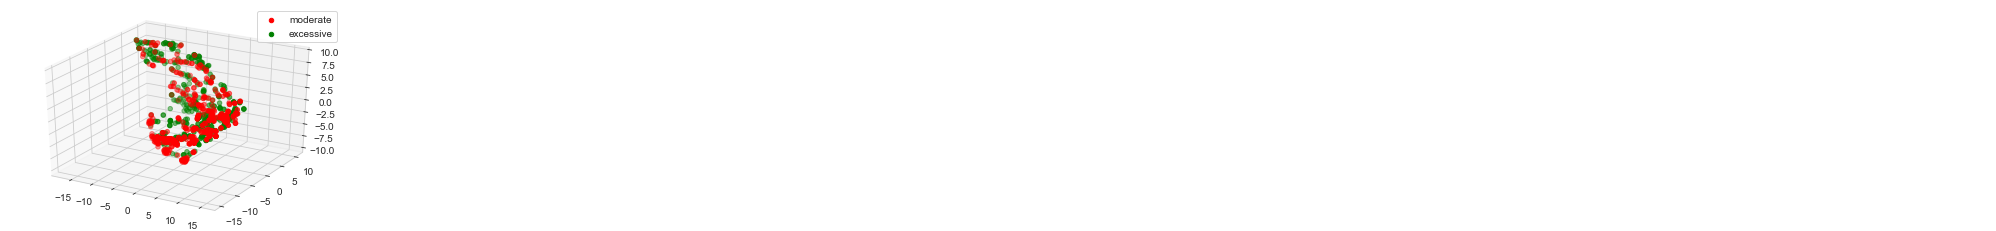

In [18]:
col = 'Absenteeism category'
df = pd.read_csv(file)
data = sample_data(df, col)

X, y = np.split(data,[-1],axis=1) # Or simply : np.split(data,[-1],1)
X = normalize(X, axis=1, norm='l1')

tsne = TSNE(n_components=3)
X_3d = tsne.fit_transform(X)
y = y.ravel()

print(X_3d)

target_names = np.unique(y)
target_ids = range(len(target_names))
names = ["moderate", "excessive"]
print(target_names)
print(target_ids)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = 'r', 'g', 'b'
for i, c, label in zip(target_ids, colors, names):
    ax.scatter(X_3d[y == i, 0], X_3d[y == i, 1], X_3d[y == i, 2], c=c, label=label)
plt.legend()
plt.savefig('./results/vis_3d.pdf')
plt.show()